<a href="https://colab.research.google.com/github/akemitti/ciencia-de-dados/blob/main/filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validação Cruzada e Análise de Desempenho

*Isabella Farabotti e Rodrigo Pampolim*

In [30]:
import pandas as pd
from google.colab import files
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

Fazendo o upload da base

In [31]:
# Carregar a aba "Base_filmes" em um DataFrame
uploaded = files.upload()

df = pd.read_excel('Base_Filmes.xlsx')

# Exibir as primeiras linhas do DataFrame para inspecionar a estrutura e os dados
df.head()

Saving Base_Filmes.xlsx to Base_Filmes (7).xlsx


,Indice,Ano de lançamento,Duração do filme em minutos,Classificação do usuário do IMDb.,Número de votos no IMDb.,Classificação do Metascore.,Renda bruta do filme.,Certificação
0,0,1994,142,9.3,2804443,82.0,28340000.0,R
1,1,1972,175,9.2,1954174,100.0,134970000.0,R
2,4,2008,152,9.0,2786129,84.0,534860000.0,PG-13
3,5,1993,195,9.0,1409869,95.0,96900000.0,R
4,6,2003,201,9.0,1919908,94.0,377850000.0,PG-13


In [32]:
# Numero de linhas e colunas do DataFrame
df.shape

(6465, 8)

Iniciando o tratamento da base

In [45]:
# Remove espaços em branco no início ou final dos nomes das colunas para evitar problemas de acesso
df.columns = df.columns.str.strip()

# Criar a variável alvo 'sucesso' (1 para IMDb >= 8.0, 0 caso contrário)
df['sucesso'] = np.where(df['Classificação do usuário do IMDb.'] >= 8.0, 1, 0)

# Preenchemos os valores ausentes com 0 para simplificar.
df

features = df[['Ano de lançamento',
               'Duração do filme em minutos',
               'Número de votos no IMDb.',
               'Classificação do Metascore.',
               'Renda bruta do filme.']].fillna(0)

df

,Indice,Ano de lançamento,Duração do filme em minutos,Classificação do usuário do IMDb.,Número de votos no IMDb.,Classificação do Metascore.,Renda bruta do filme.,Certificação,sucesso,Certificação_cod
0,0,1994,142,9.3,2804443,82.0,2.834000e+07,R,1,13
1,1,1972,175,9.2,1954174,100.0,1.349700e+08,R,1,13
2,4,2008,152,9.0,2786129,84.0,5.348600e+08,PG-13,1,11
3,5,1993,195,9.0,1409869,95.0,9.690000e+07,R,1,13
4,6,2003,201,9.0,1919908,94.0,3.778500e+08,PG-13,1,11
...,...,...,...,...,...,...,...,...,...,...
6460,9986,2010,99,4.9,14472,38.0,1.000000e+04,R,0,13
6461,9987,1998,114,4.9,20662,41.0,1.207000e+07,PG,0,10
6462,9988,2012,114,4.9,11205,42.0,6.565000e+15,PG-13,0,11
6463,9989,2017,91,4.9,13449,50.0,1.000000e+04,Not Rated,0,9


Transformando coluna 'Certificação' em código para que o modelo consiga ler o valor

In [46]:
# Usamos o LabelEncoder para atribuir um número para cada categoria.
label_encoder = LabelEncoder()
df['Certificação'] = df['Certificação'].astype(str)  # Garante que os dados sejam do tipo string
df['Certificação_cod'] = label_encoder.fit_transform(df['Certificação'])

# Adiciona a coluna codificada como mais uma feature para o modelo
features['Certificação_cod'] = df['Certificação_cod']

Definição do modelo

In [47]:
# Definição da variável alvo para o modelo
target = df['sucesso']

# Definição dos modelos a serem comparados
# Modelo 1: Árvore de Decisão
decision_tree = DecisionTreeClassifier(random_state=42)

# Modelo 2: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)

# Configuração da validação cruzada com k-pastas (neste caso, k=5)
kpastas = KFold(n_splits=5, shuffle=True, random_state=42)

# Avaliação dos modelos usando a métrica de acurácia com cross validation
dt_scores = cross_val_score(decision_tree, features, target, cv=kpastas, scoring='accuracy')
knn_scores = cross_val_score(knn, features, target, cv=kpastas, scoring='accuracy')

print("Acurácia média da Árvore de Decisão:", np.mean(dt_scores))
print("Acurácia média do KNN:", np.mean(knn_scores))

Acurácia média da Árvore de Decisão: 0.954215003866976
Acurácia média do KNN: 0.9488012374323279


Implementação da solução de feature_importances para a Árvore de Decisão

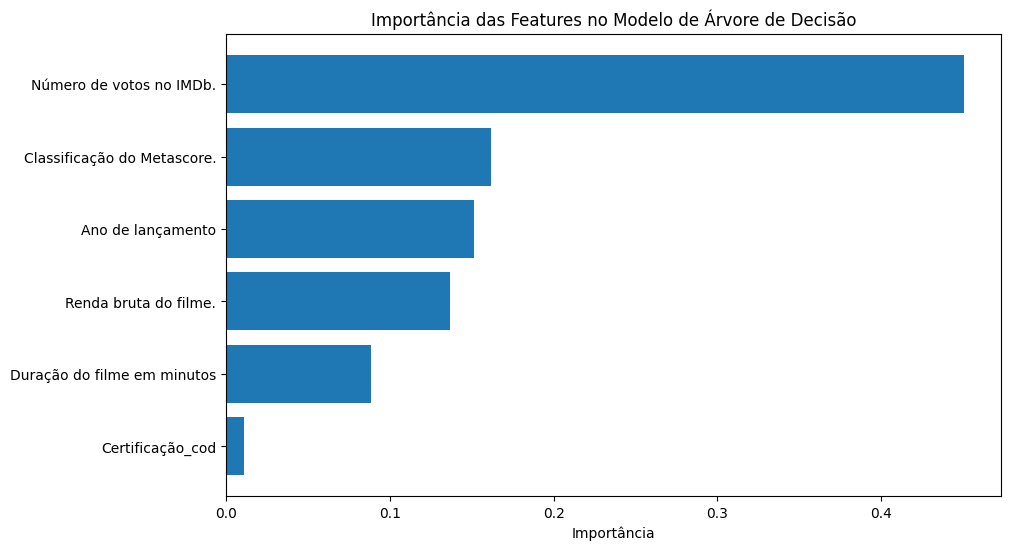

In [48]:
# Treina o modelo de Árvore de Decisão com os dados completos
decision_tree.fit(features, target)

# Calcula a importância de cada feature
importances = decision_tree.feature_importances_

# Ordena os índices das importâncias de forma crescente
sorted_idx = np.argsort(importances)

# Plot da importância das features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features.columns[sorted_idx])
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo de Árvore de Decisão')
plt.show()

In [50]:
# Exibição dos resultados médios de acurácia para cada modelo
results = pd.DataFrame({
    'Modelo': ['Árvore de Decisão', 'KNN'],
    'Acurácia Média': [np.mean(dt_scores), np.mean(knn_scores)]
})
print("Comparação de Desempenho (Acurácia Média):")
print(results)

Comparação de Desempenho (Acurácia Média):
              Modelo  Acurácia Média
0  Árvore de Decisão        0.954215
1                KNN        0.948801
